In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('whitegrid')

In [4]:
data = pd.read_csv('./1553768847-housing.csv')

In [5]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [58]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [59]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [61]:
data.total_bedrooms.mean(), data.total_bedrooms.median()

(537.8705525375618, 435.0)

In [62]:
# data.total_bedrooms = data.total_bedrooms.replace(np.nan,data.total_bedrooms.mean())
data.total_bedrooms = data.total_bedrooms.replace(np.nan,0)

In [63]:
data.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

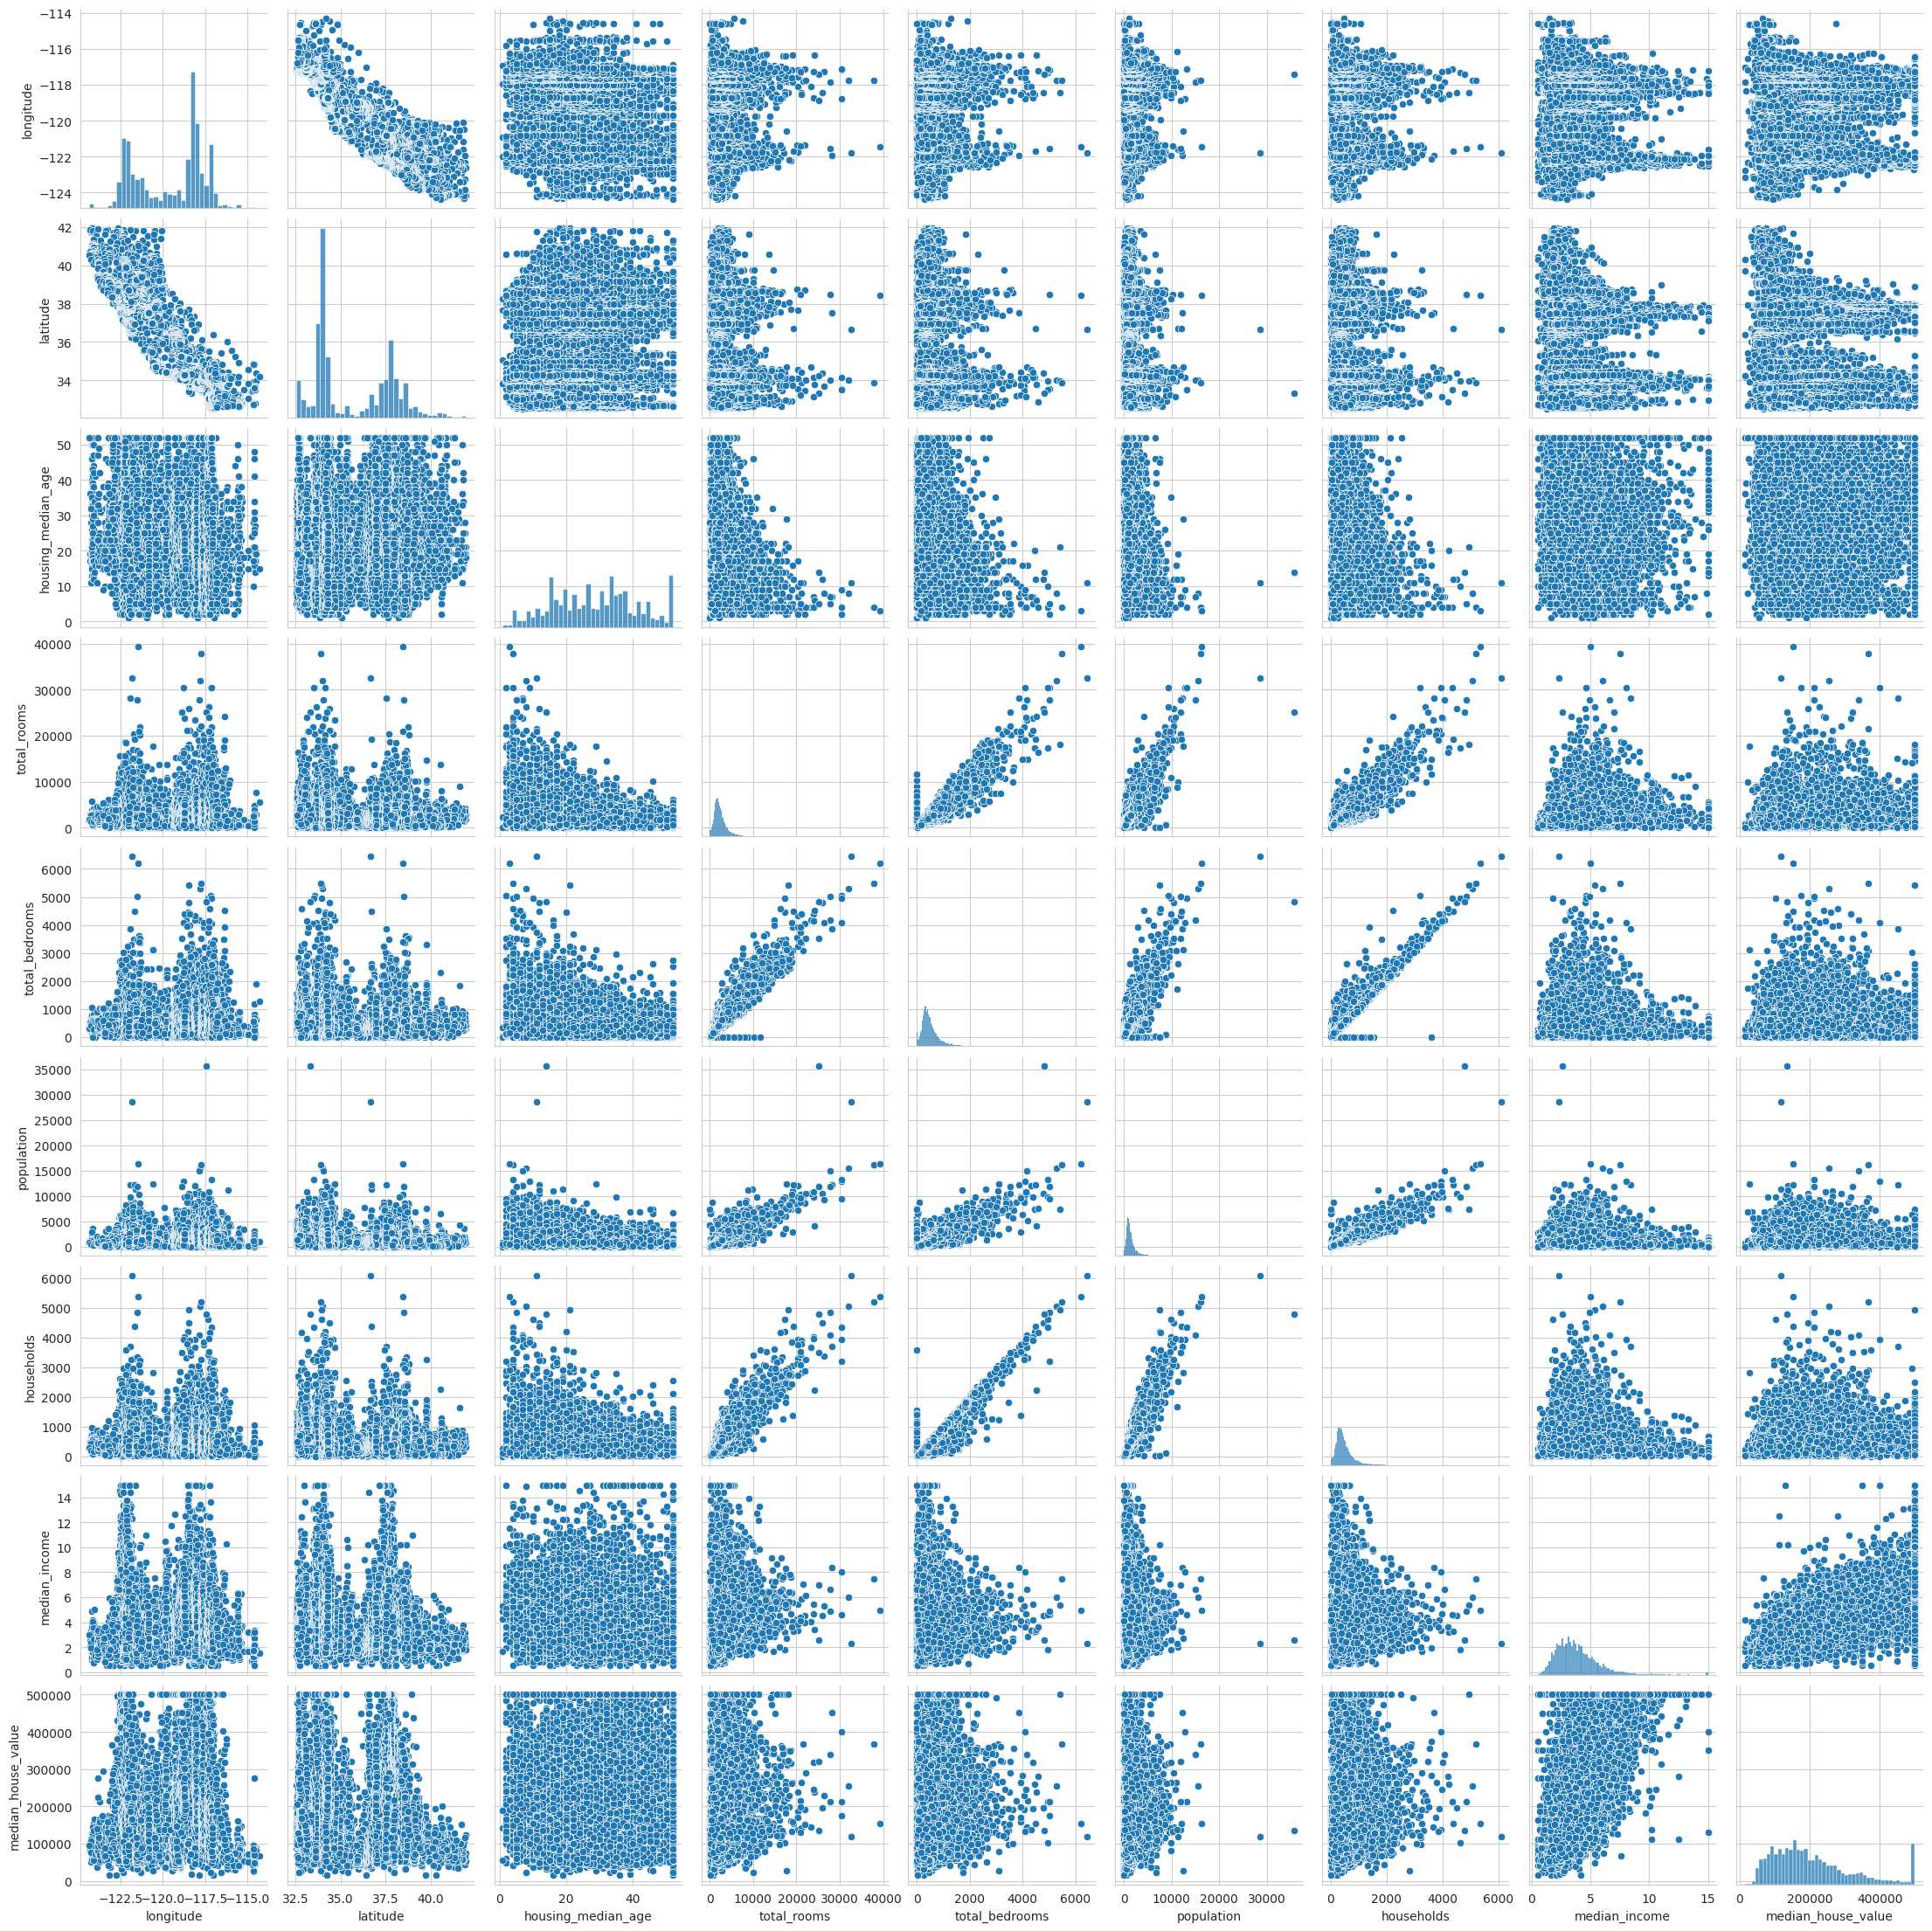

In [64]:
sns.pairplot(data)

<ipython-input-65-8b96879b4d02>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

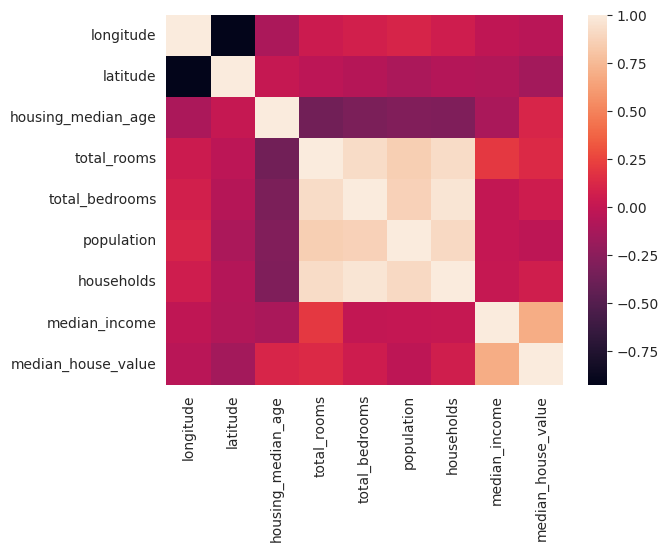

In [65]:
sns.heatmap(data.corr())

In [66]:
len(data)

20640

In [67]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [68]:
data.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [69]:
from sklearn.preprocessing import LabelEncoder

In [70]:
le = LabelEncoder()

In [71]:
data.ocean_proximity =  le.fit_transform(data.ocean_proximity)

In [72]:
data.ocean_proximity.unique()

array([3, 0, 1, 4, 2])

In [74]:
X = data.drop(['longitude','latitude','median_house_value'],axis=1)
y = data['median_house_value']

In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [76]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [77]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_test,y_test)

LinearRegression()

In [78]:
clf.score(X_train,y_train)

0.5685333671980737

In [79]:
clf.score(X_test,y_test)

0.5555131763932954

In [80]:
from sklearn.ensemble import RandomForestRegressor

clf2 = RandomForestRegressor(max_depth=2, random_state=0)

clf2.fit(X_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [81]:
clf2.score(X_train,y_train)

0.4707125776596277

In [82]:
clf2.score(X_test,y_test)

0.4426102449152912

In [132]:
from sklearn.neural_network import MLPRegressor

clf4 = MLPRegressor(hidden_layer_sizes=512,batch_size=64,learning_rate='adaptive',momentum=0.7,max_iter=600)

clf4.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=64, hidden_layer_sizes=512, learning_rate='adaptive',
             max_iter=600, momentum=0.7)

In [133]:
clf4.score(X_train,y_train)

0.6619268004453378

In [134]:
clf4.score(X_test,y_test)

0.6389442322273038

In [137]:
ypred1 = clf.predict(X_test)
ypred2 = clf2.predict(X_test)
ypred3 = clf4.predict(X_test)

In [135]:
from sklearn import metrics

def printmetric(y_pred):
  print("MSE: ",metrics.mean_squared_error(y_test,y_pred))
  print("MAE: ",metrics.mean_absolute_error(y_test,y_pred))
  print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
  print("R2 Score: ",metrics.r2_score(y_test,y_pred))

In [141]:
print("Metrics for Linear Regression:")
printmetric(ypred1)

Metrics for Linear Regression:
MSE:  5824595243.640049
MAE:  56413.14125914118
RMSE:  76319.03591922561
R2 Score:  0.5555131763932954


In [142]:
print("Metrics for Random Forest:")
printmetric(ypred2)

Metrics for Random Forest:
MSE:  7304085394.424987
MAE:  64762.94899523856
RMSE:  85463.94207164204
R2 Score:  0.4426102449152912


In [143]:
print("Metrics for MLPRegressor")
printmetric(ypred3)

Metrics for MLPRegressor
MSE:  4731307197.350025
MAE:  48714.28064925901
RMSE:  68784.49823434075
R2 Score:  0.6389442322273038
